# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [1]:
# Importa las librerias <3 


In [2]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.


In [3]:
# Visualiza el DataFrame


In [4]:
# Obten información de los datos.


## <span style="color:green">2. Análisis de cada Variable</span>

In [5]:
#Importa seaborn para tener gráficos más chidos 

#Gráfica la variable 
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen

#Crea un displot para de la edad (por ser una variable numérica)


In [6]:
# Género: cuenta cuántos hombres y mujeres hay


In [7]:
# Crea una gráfica de barras para Presión Sanguinea


In [8]:
# Crea una gráfica de barras para Colesterol


In [9]:
# Crea un displot para Sodio Potasio


In [10]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊

#Cuenta los medicamentos


***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


In [11]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊


In [12]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas

#Grafica la tablita anterior con una gráfica de barras


In [13]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊


In [14]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊


In [15]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da


***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [16]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc



In [17]:
# Crear set de entrenamiento y set de prueba


El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [18]:
## Crear modelo para medicamento


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [19]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)



In [20]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado 


👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [21]:
# Realiza una Cross validation/K-Folds


 
**cv:** número de dobleses 

**scoring:** accuracy (será nuestra medida de desempeño)  

In [22]:
# Modelo que nunca es Y


***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [23]:
# Matriz de confusión
#Importar cross_val_predict 

#Importar confusion_matrix


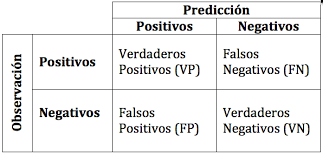

**Verdaderos Negativos**: esquina superior izquierda 

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha 

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [24]:
#Importar precision_score y recall_score 


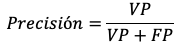

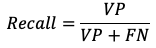

In [25]:
#Cambiar de clasificador
#Importar RandomForestClassifier

#Hacer la matriz de confusión otra vez


In [26]:
#Calcular la precisión y recall con el nuevo clasificador 


In [27]:
#Calcular F1


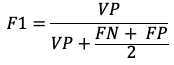

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [28]:
#Puntación de un paciente aleatorio


In [29]:
#Graficar la precisión y recall 

#Puedes visualizar los y_scores pero no te dice nada, la gráfica si lo hará 
#Graficar la precisión y recall, ahora si


El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

In [30]:
#Supon que ya lo pensaste y querías un umbral  90 


In [31]:
#Arroja la precisión y recall para un umbral de 90


***

### <span style="color:blue">6.5 Curva ROC</span>


Grafica Recall contra el porcentaje de Falsos Positivos

In [32]:
#Importar roc_curve


In [33]:
#Graficar la curva ROC

#Poner una cuadrícula


Un modelo perfecto se asimila a una escuadra entre la curva ROC y la línea punteada porque existe una mayor área bajo la curva

In [34]:
#Calcular el puntaje de la curva


In [35]:
#Compararlo con el modelo de random forest


In [36]:
#Graficar la curva ROC y la predicción de random forest 


In [37]:
#Calcular el puntaje (área bajo la curva) de random forest  


***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [38]:
# Importar SVC=Support Vector Classifier



#Predecir a un humano aleatorio para ver que todo este funcionando bien 


In [39]:
#Utilizar decision_function para observar los puntajes de cada medicina 

#Decidirá por el qué tenga mayor puntaje

In [40]:
#Ahora, utiliza el clasificador multiclase 

#Predecir a un humano ahora con este clasificador


In [41]:
#Utilizar decision_function para observar los puntajes de cada medicina 


In [42]:
#campararlo con los datos obtenidos de sgd.fit 


***

## <span style="color:green">8. Analizar Errores</span>

In [43]:
#Hacer un clasificador de random forest


In [44]:
#Utilizar la matriz de confusión 


In [45]:
#utilizar ahora SGD
